In [1]:
import numpy as np
from dataset.timeseriesToyDataset.twoLinearDataset import twoLinearDataset
from evaluator.visualize import lineplot
from dataset.timeseriesToyDataset.twoLinearDataset import LinearParameter
from dataset.timeseriesToyDataset.twoLinearDatasetWithShifts import twoLinearDatasetWithShifts
from dataset.timeseriesToyDataset.sample_dataset_specification import add_shifts_to_linear_params

from DRE.MLBasedDRE import MLBasedDRE, MLBasedDRE_Parameter
from models.MLP_torch import MLP_Parameter
from models.modelFactory import ModelFactory

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

/home/work/.cache/pypoetry/virtualenvs/godaddy-3UyvmeC2-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MLP_Parameter


# model

In [2]:
ToyDatasetProblem = [
    (LinearParameter(0, 5, 0.1, 10000), LinearParameter(0, 14, 0.1, 10000)),
    (LinearParameter(0.0005, 2, 0.1, 10000), LinearParameter(0.0005, 10, 0.1, 10000)),
    (LinearParameter(0.001, 2, 0.1, 10000), LinearParameter(0.001, 4, 0.1, 10000)),
    (LinearParameter(0, 3, 0.1, 10000), LinearParameter(0.001, 3, 0.1, 10000)),
    (LinearParameter(0.001, 2, 0.1, 10000), LinearParameter(0, 12, 0.1, 10000)),
    (LinearParameter(0.0001, 2, 0.1, 10000), LinearParameter(0.001, 3, 0.1, 10000)),
    (LinearParameter(0.001, 3, 0.1, 10000), LinearParameter(-0.001, 13, 0.1, 10000)),
    (LinearParameter(0, 8, 0.1, 10000), LinearParameter(0, 8, 0.1, 10000)),
    (LinearParameter(0.0005, 3, 0.1, 10000), LinearParameter(0.0005, 8, 0.1, 10000)),
]

In [3]:
def creat_result(estimator_param, nshift):
    fig, axes = plt.subplots(3, 3, figsize=(30, 20))
    
    for idx,p in enumerate(ToyDatasetProblem):
        n = nshift
        axes[idx//3][idx%3].set_ylim([0, 17])
        
        if nshift == 0:
            dataset = twoLinearDataset(p)            
        else:
            dataset = twoLinearDatasetWithShifts(add_shifts_to_linear_params(p, n))
            dataset.drop_nulls(f"x{nshift}")
            
            
        
        estimator = MLBasedDRE(param)
        score = estimator.estimate(dataset)
        axes[idx//3][idx%3].set_title(f"specuation{score}")
        sns.lineplot(dataset.data, x="idx", y="x", hue = "rprob",ax = axes[idx//3][idx%3])

# NewralNetwork

100%|██████████| 5000/5000 [00:02<00:00, 2186.41it/s]


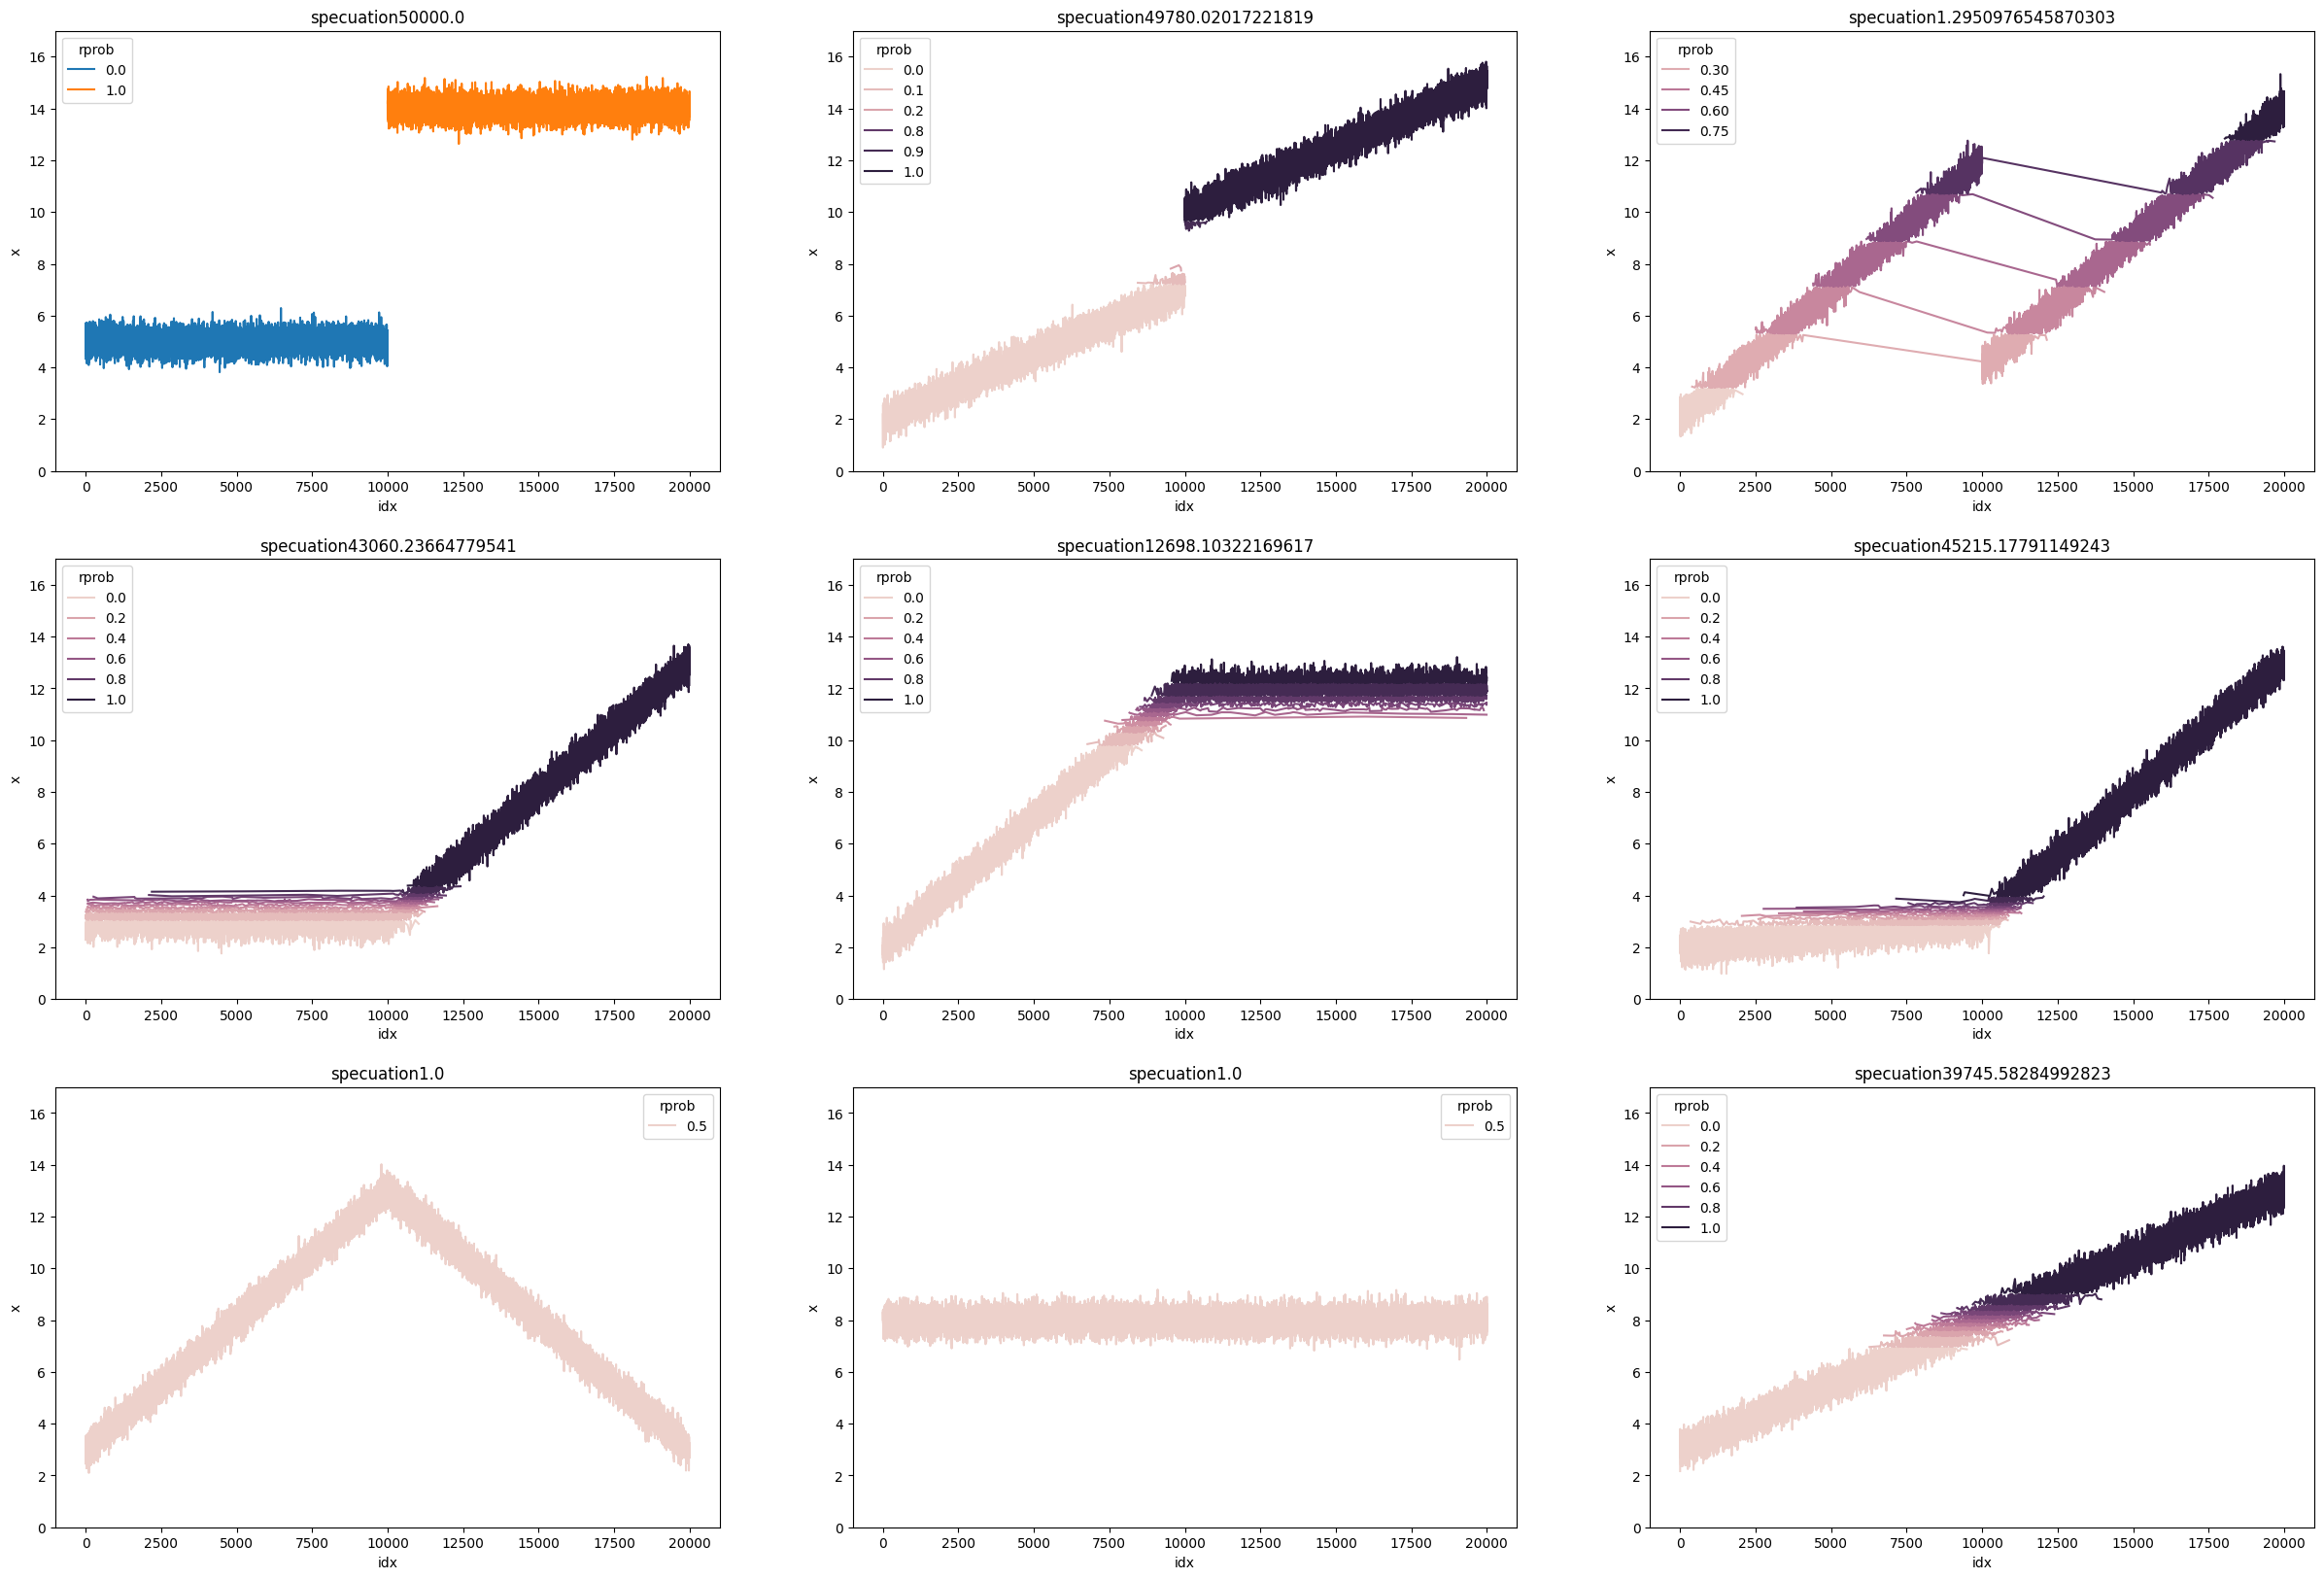

In [4]:
n = 0
model_param = {"inputdim": n+1, "epochs": 5000, "lr": 0.001, "cuda": True}
param = {"model_param": MLP_Parameter.from_dict(model_param)}
creat_result(param, n)

100%|██████████| 5000/5000 [00:03<00:00, 1590.82it/s]


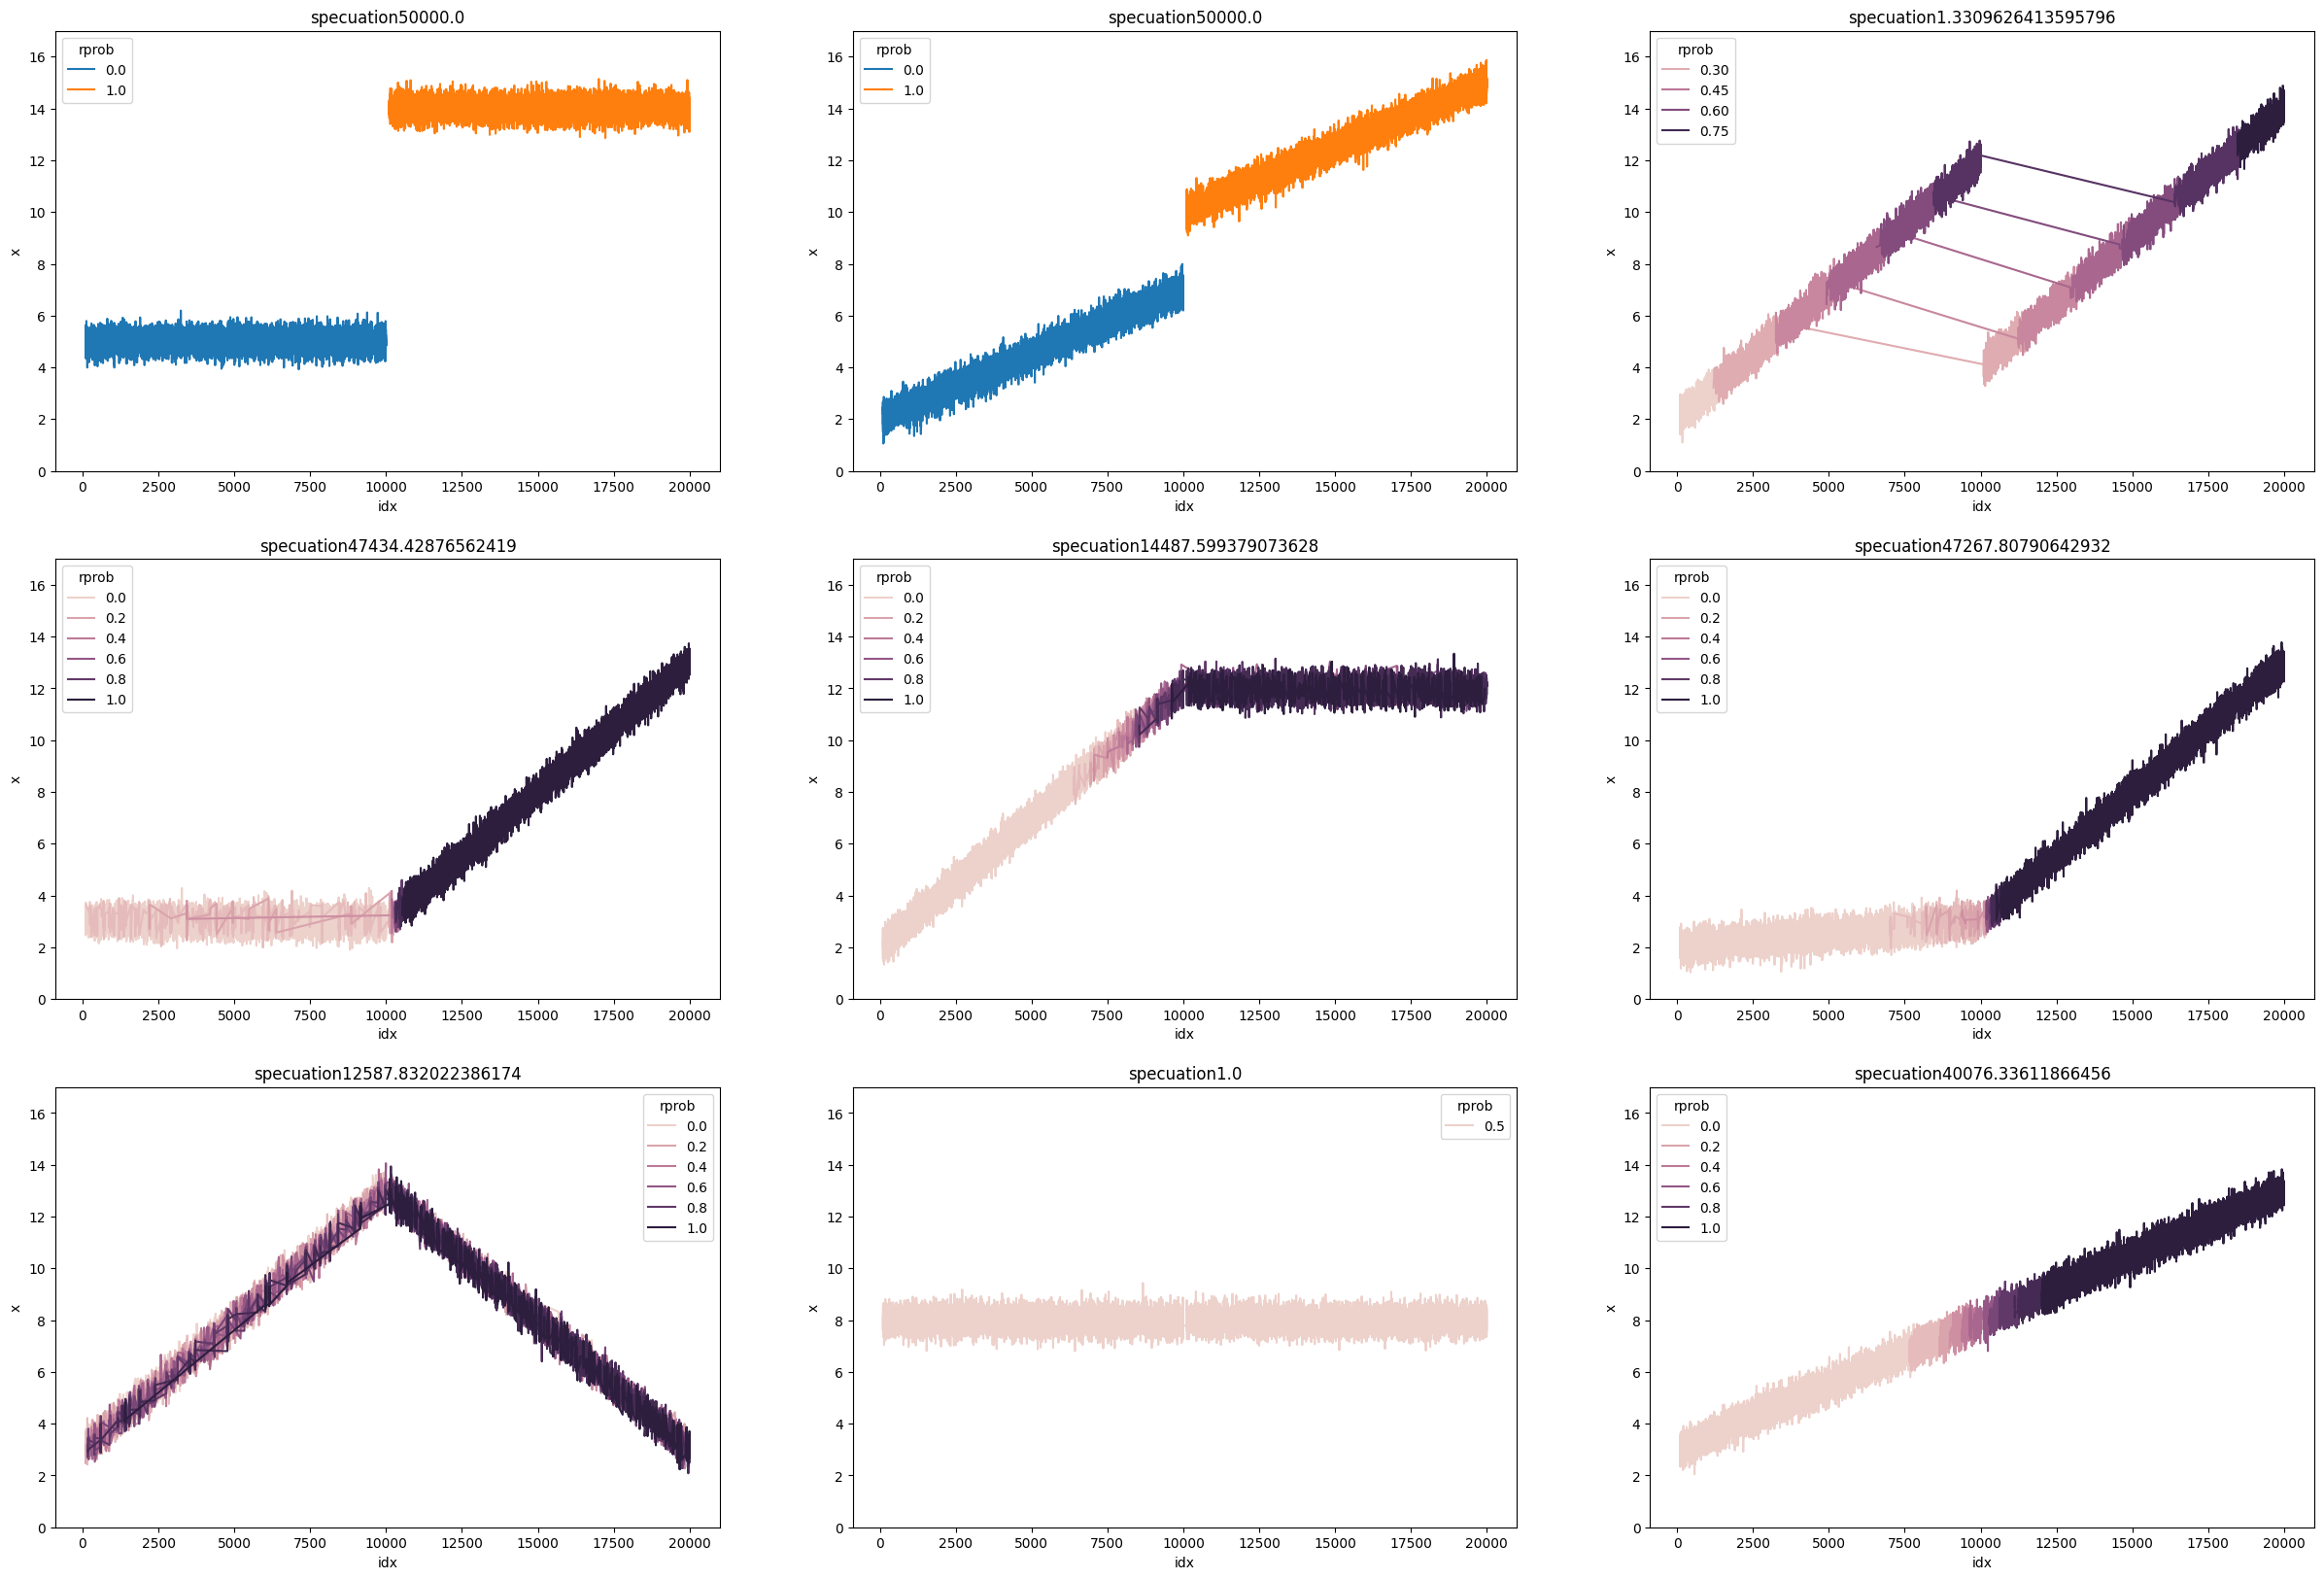

In [7]:
n = 100
model_param = {"inputdim": n+1, "epochs": 5000, "lr": 0.001, "cuda": True}
param = {"model_param": MLP_Parameter.from_dict(model_param)}
creat_result(param, n)